Données chargées avec succès.
Nombre total d'enregistrements pour vehA : 214
Nombre total d'enregistrements pour les véhicules B, C, D : 463
Données préparées et filtrées pour l'intervalle 0-30s.
Nombre d'enregistrements pour vehA après filtrage : 214
Nombre d'enregistrements pour les véhicules B, C, D après filtrage : 463


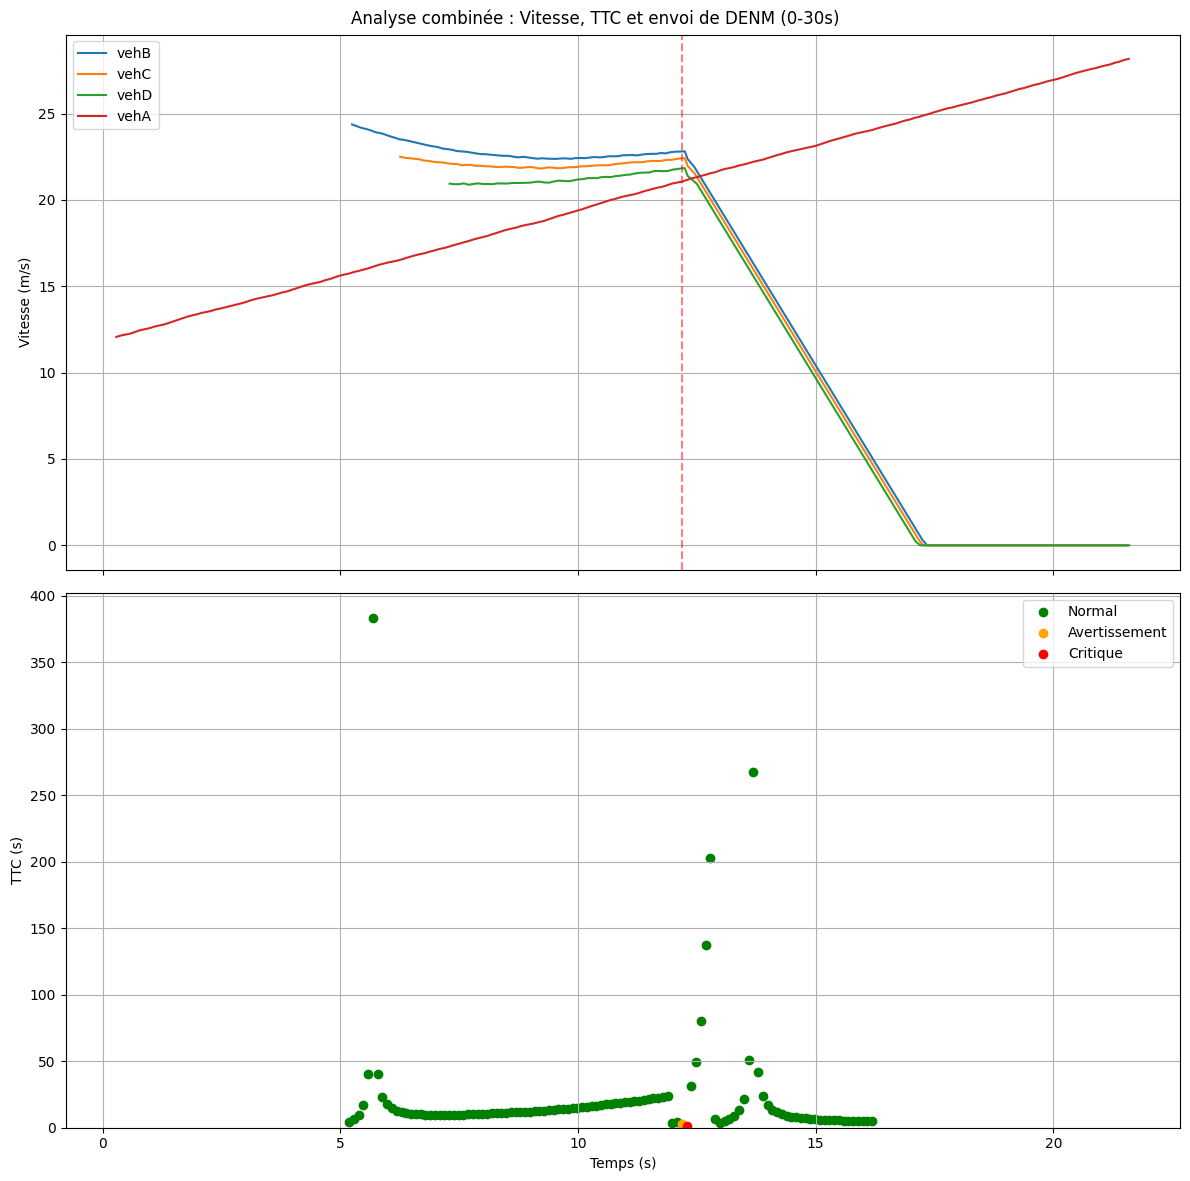

Graphique d'analyse combinée sauvegardé.
Nombre total de DENM envoyés : 2
Nombre de lignes DENM affichées : 1


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

# Création du répertoire pour sauvegarder les images
if not os.path.exists('./images'):
    os.makedirs('./images')

# Chargement des données
warning_data = pd.read_csv('collision_data_vehA.csv')
alert_data_B = pd.read_csv('collision_alert_vehB.csv')
alert_data_C = pd.read_csv('collision_alert_vehC.csv')
alert_data_D = pd.read_csv('collision_alert_vehD.csv')

# Fusionner les données des véhicules B, C et D
alert_data = pd.concat([alert_data_B, alert_data_C, alert_data_D])

print("Données chargées avec succès.")
print(f"Nombre total d'enregistrements pour vehA : {len(warning_data)}")
print(f"Nombre total d'enregistrements pour les véhicules B, C, D : {len(alert_data)}")

# Préparation des données
warning_data['Time'] = pd.to_numeric(warning_data['Time'])
alert_data['Time'] = pd.to_numeric(alert_data['Time'])

# Trier les données par temps
warning_data = warning_data.sort_values('Time')
alert_data = alert_data.sort_values('Time')

# Filtrer les données pour l'intervalle 0-30s
warning_data = warning_data[(warning_data['Time'] >= 0) & (warning_data['Time'] <= 30)]
alert_data = alert_data[(alert_data['Time'] >= 0) & (alert_data['Time'] <= 30)]

# Créer une colonne pour les moments d'envoi de DENM
warning_data['DENM_Sent'] = warning_data['SubCauseCode'].apply(lambda x: 1 if x in [1, 2] else 0)

print("Données préparées et filtrées pour l'intervalle 0-30s.")
print(f"Nombre d'enregistrements pour vehA après filtrage : {len(warning_data)}")
print(f"Nombre d'enregistrements pour les véhicules B, C, D après filtrage : {len(alert_data)}")

# Variables pour contrôler l'affichage des lignes DENM
max_denm_lines = 5  # Nombre maximum de lignes DENM à afficher
min_time_between_denm_lines = 1  # Temps minimum (en secondes) entre deux lignes DENM

# Fonction pour filtrer les moments d'envoi de DENM
def filter_denm_times(denm_times):
    filtered_times = []
    last_time = -np.inf
    for time in denm_times:
        if len(filtered_times) < max_denm_lines and time - last_time >= min_time_between_denm_lines:
            filtered_times.append(time)
            last_time = time
    return filtered_times

# Analyse combinée
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12), sharex=True)

# Vitesse des véhicules
for vehicle in ['vehB', 'vehC', 'vehD']:
    vehicle_data = alert_data[alert_data['VehicleID'] == vehicle]
    ax1.plot(vehicle_data['Time'], vehicle_data['Speed'], label=vehicle)
ax1.plot(warning_data['Time'], warning_data['Speed'], label='vehA')
ax1.set_ylabel("Vitesse (m/s)")
ax1.legend()
ax1.grid(True)

# Ajouter des lignes verticales pour les envois de DENM
denm_times = warning_data[warning_data['DENM_Sent'] == 1]['Time']
filtered_denm_times = filter_denm_times(denm_times)
for time in filtered_denm_times:
    ax1.axvline(x=time, color='r', linestyle='--', alpha=0.5)

# TTC
warning_critical = warning_data[warning_data['SubCauseCode'] == 2]
warning_warning = warning_data[warning_data['SubCauseCode'] == 1]
warning_normal = warning_data[warning_data['SubCauseCode'] == 0]

ax2.scatter(warning_normal['Time'], warning_normal['TTC'], c='green', label='Normal')
ax2.scatter(warning_warning['Time'], warning_warning['TTC'], c='orange', label='Avertissement')
ax2.scatter(warning_critical['Time'], warning_critical['TTC'], c='red', label='Critique')
ax2.set_ylabel("TTC (s)")
ax2.set_ylim(bottom=0)
ax2.legend()
ax2.grid(True)

plt.xlabel("Temps (s)")
plt.suptitle("Analyse combinée : Vitesse, TTC et envoi de DENM (0-30s)")
plt.tight_layout()
plt.savefig('./images/analyse_combinee.png')
plt.show()

print("Graphique d'analyse combinée sauvegardé.")
print(f"Nombre total de DENM envoyés : {len(denm_times)}")
print(f"Nombre de lignes DENM affichées : {len(filtered_denm_times)}")

Données chargées pour le véhicule veh2.
Nombre total d'enregistrements pour ce véhicule : 520
Données chargées pour le véhicule veh1.
Nombre total d'enregistrements pour ce véhicule : 294
Données chargées pour le véhicule veh3.
Nombre total d'enregistrements pour ce véhicule : 470
Données chargées pour le véhicule veh0.
Nombre total d'enregistrements pour ce véhicule : 426
Données chargées avec succès.
Nombre total d'enregistrements pour les véhicules : 1710
Nombre total d'enregistrements DENM : 1087
Données filtrées pour l'intervalle 0-30s.
Nombre d'enregistrements pour les véhicules après filtrage : 892
Nombre d'enregistrements DENM après filtrage : 591


/tmp/ipykernel_3935/2110257816.py:44: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  denm_data = pd.concat(denm_data_list, ignore_index=True)


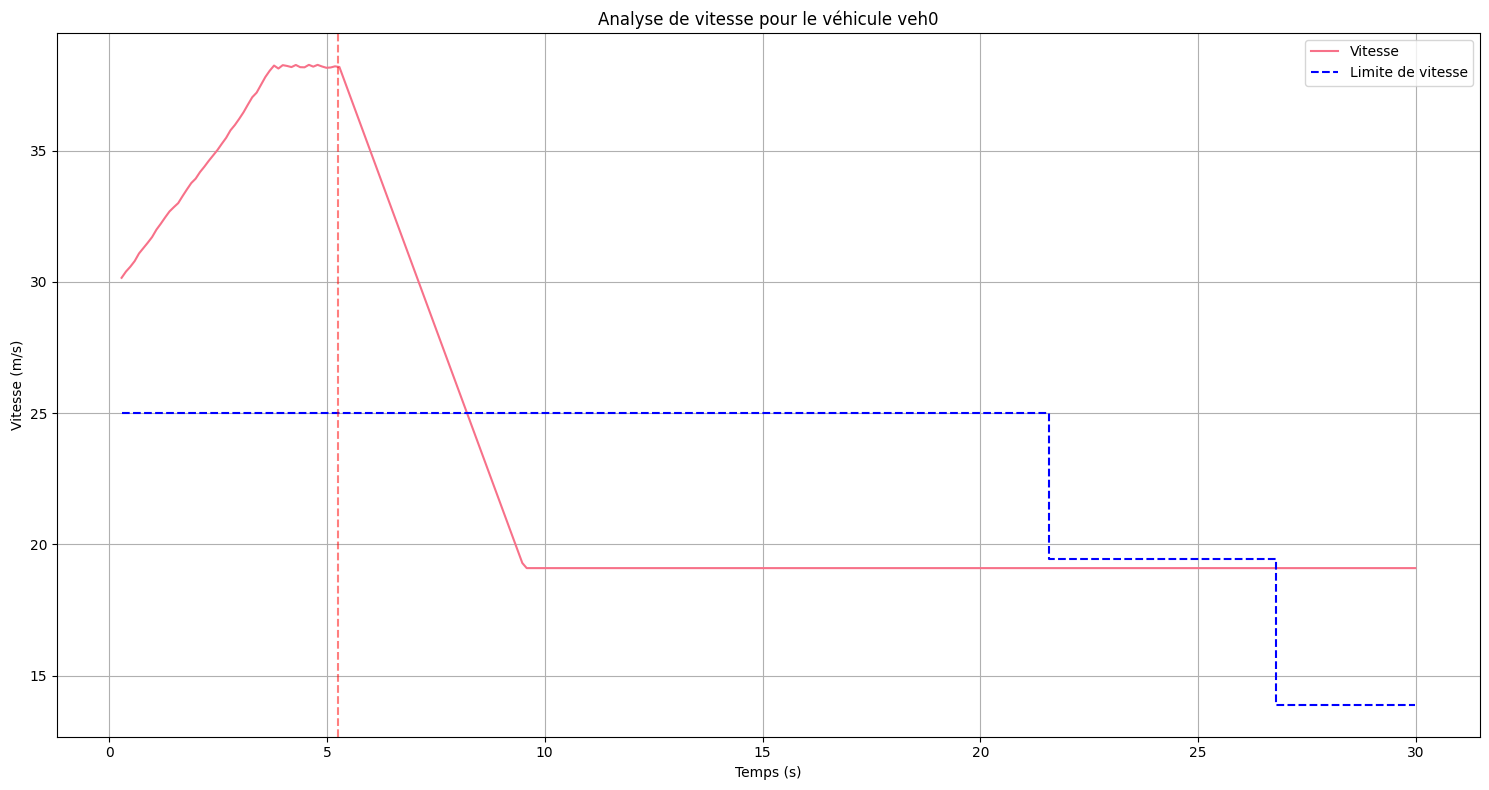

Graphique d'analyse de vitesse pour le véhicule veh0 sauvegardé.
Nombre total de DENM envoyés pour ce véhicule : 0
Nombre de lignes DENM affichées : 0




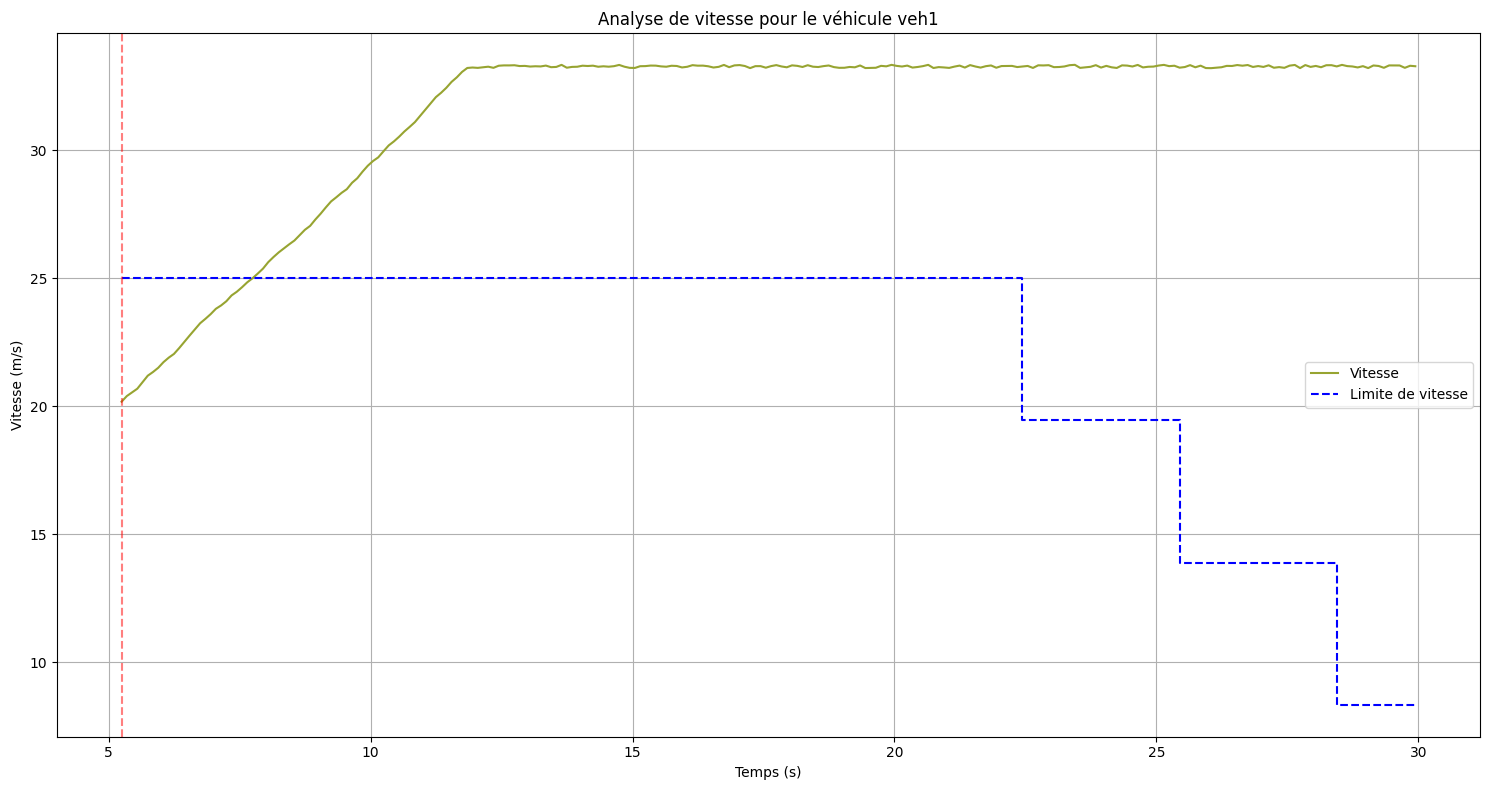

Graphique d'analyse de vitesse pour le véhicule veh1 sauvegardé.
Nombre total de DENM envoyés pour ce véhicule : 0
Nombre de lignes DENM affichées : 0




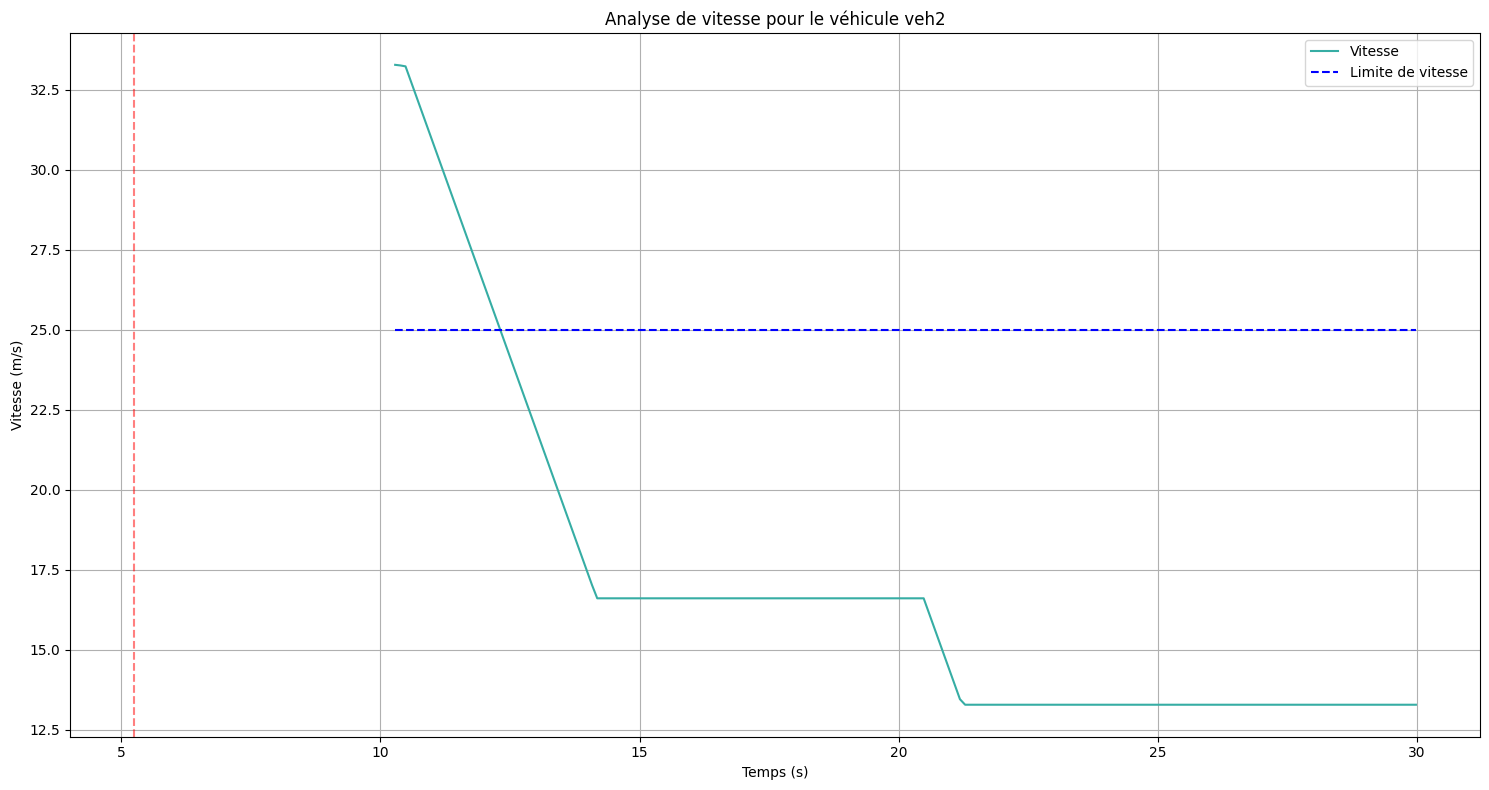

Graphique d'analyse de vitesse pour le véhicule veh2 sauvegardé.
Nombre total de DENM envoyés pour ce véhicule : 0
Nombre de lignes DENM affichées : 0




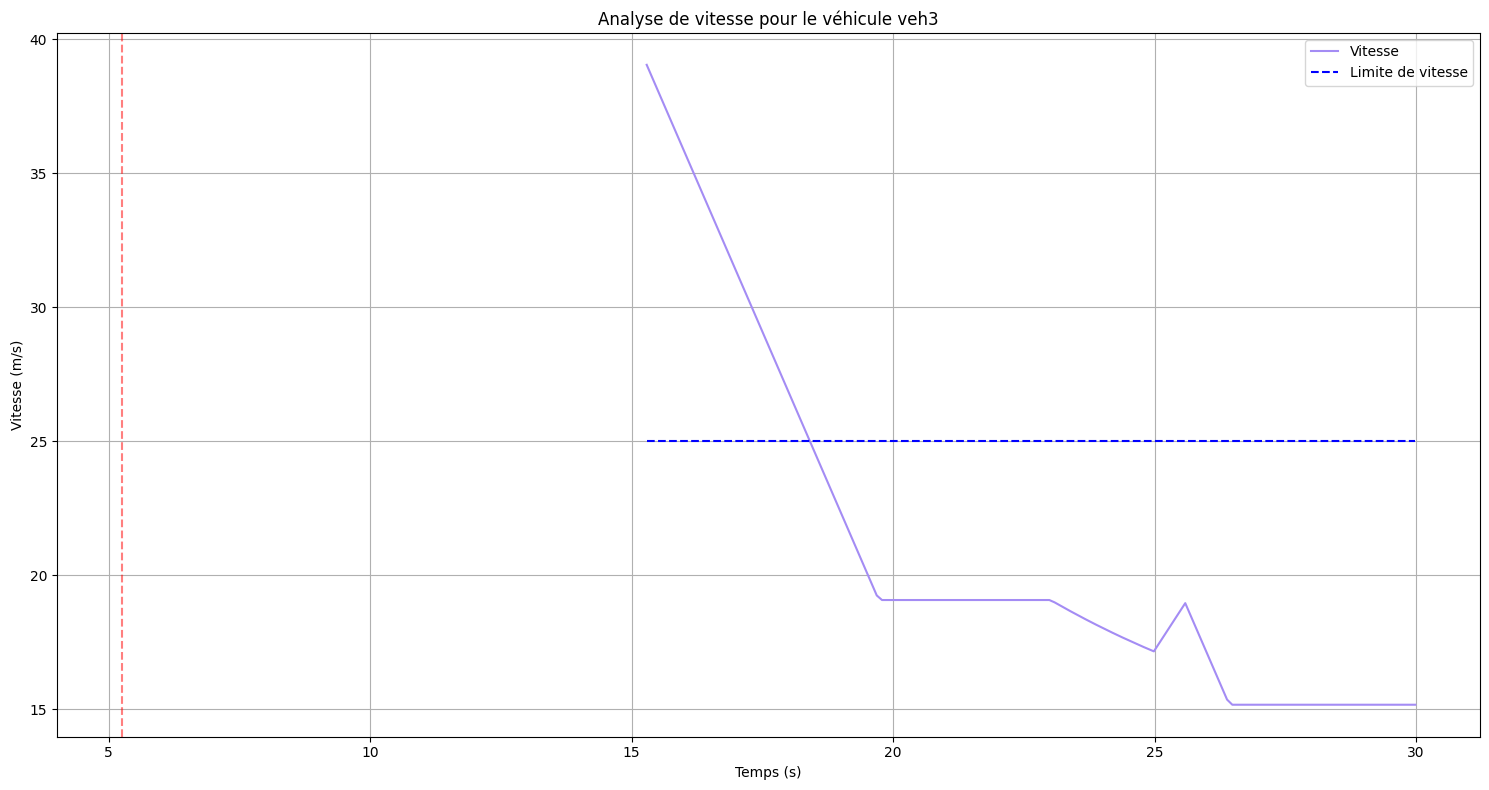

Graphique d'analyse de vitesse pour le véhicule veh3 sauvegardé.
Nombre total de DENM envoyés pour ce véhicule : 0
Nombre de lignes DENM affichées : 0




,Time,SenderSumoID,SenderStationID,OffenderSumoID,OffenderStationID,DetectedSpeed,PosX,PosY,ViolationType
0,5.245,veh1,376,18,veh0,38.21,2786.73,7545.27,Critical
1,5.345,veh1,376,18,veh0,38.21,2786.73,7545.27,Critical
2,5.445,veh1,376,18,veh0,38.21,2786.73,7545.27,Critical
3,5.545,veh1,376,18,veh0,38.21,2786.73,7545.27,Critical
4,5.645,veh1,376,18,veh0,38.21,2786.73,7545.27,Critical
5,5.745,veh1,376,18,veh0,38.21,2786.73,7545.27,Critical
6,5.845,veh1,376,18,veh0,38.21,2786.73,7545.27,Critical
7,5.945,veh1,376,18,veh0,38.21,2786.73,7545.27,Critical
8,6.045,veh1,376,18,veh0,38.21,2786.73,7545.27,Critical
9,6.145,veh1,376,18,veh0,38.21,2786.73,7545.27,Critical


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
from IPython.display import display, HTML

# Paramètres configurables
START_TIME = 0  # Temps de début de l'analyse
END_TIME = 30   # Temps de fin de l'analyse
MAX_DENM_LINES = 10  # Nombre maximum de lignes DENM à afficher par seconde
TOLL_X = 3172.5
TOLL_Y = 6697.595

# Chemins des fichiers
DATA_DIR = '/home/yelfatihi/artery/scenarios/speed_warning_scenario/data'

# Création du répertoire pour sauvegarder les images
IMAGES_DIR = os.path.join(DATA_DIR, 'images')
if not os.path.exists(IMAGES_DIR):
    os.makedirs(IMAGES_DIR)

# Chargement des données des véhicules
vehicle_data_files = [f for f in os.listdir(DATA_DIR) if f.startswith('vehicle_data_veh') and f.endswith('.csv')]
vehicle_data_list = []

for file in vehicle_data_files:
    df = pd.read_csv(os.path.join(DATA_DIR, file))
    df['VehicleID'] = file.split('_')[-1].split('.')[0]  # Extraire l'ID du véhicule du nom du fichier
    vehicle_data_list.append(df)
    print(f"Données chargées pour le véhicule {df['VehicleID'].iloc[0]}.")
    print(f"Nombre total d'enregistrements pour ce véhicule : {len(df)}")

vehicle_data = pd.concat(vehicle_data_list, ignore_index=True)

# Chargement des données DENM
denm_data_files = [f for f in os.listdir(DATA_DIR) if f.startswith('denm_data') and f.endswith('.csv')]
denm_data_list = []

for file in denm_data_files:
    df = pd.read_csv(os.path.join(DATA_DIR, file))
    denm_data_list.append(df)

denm_data = pd.concat(denm_data_list, ignore_index=True)

print("Données chargées avec succès.")
print(f"Nombre total d'enregistrements pour les véhicules : {len(vehicle_data)}")
print(f"Nombre total d'enregistrements DENM : {len(denm_data)}")

# Préparation des données
vehicle_data['Time'] = pd.to_numeric(vehicle_data['Time'])
denm_data['Time'] = pd.to_numeric(denm_data['Time'])

# Trier les données par temps
vehicle_data = vehicle_data.sort_values('Time')
denm_data = denm_data.sort_values('Time')

# Filtrer les données pour l'intervalle spécifié
vehicle_data = vehicle_data[(vehicle_data['Time'] >= START_TIME) & (vehicle_data['Time'] <= END_TIME)]
denm_data = denm_data[(denm_data['Time'] >= START_TIME) & (denm_data['Time'] <= END_TIME)]

print(f"Données filtrées pour l'intervalle {START_TIME}-{END_TIME}s.")
print(f"Nombre d'enregistrements pour les véhicules après filtrage : {len(vehicle_data)}")
print(f"Nombre d'enregistrements DENM après filtrage : {len(denm_data)}")

# Fonction pour calculer la limite de vitesse
def calculate_speed_limit(x, y):
    distance_to_toll = np.sqrt((x - TOLL_X)**2 + (y - TOLL_Y)**2)
    
    if distance_to_toll > 1000:
        return 110 / 3.6
    elif distance_to_toll > 400:
        return 90 / 3.6
    elif distance_to_toll > 300:
        return 70 / 3.6
    elif distance_to_toll > 200:
        return 50 / 3.6
    elif distance_to_toll > 100:
        return 30 / 3.6
    else:
        return 30 / 3.6

# Calculer la limite de vitesse pour chaque enregistrement
vehicle_data['SpeedLimit'] = vehicle_data.apply(lambda row: calculate_speed_limit(row['PosX'], row['PosY']), axis=1)

# Fonction pour filtrer les moments d'envoi de DENM
def filter_denm_times(denm_times):
    filtered_times = []
    last_time = -np.inf
    for time in denm_times:
        if len(filtered_times) < MAX_DENM_LINES * (END_TIME - START_TIME) and time - last_time >= 1/MAX_DENM_LINES:
            filtered_times.append(time)
            last_time = time
    return filtered_times

# Générer une palette de couleurs unique pour chaque véhicule
vehicles = vehicle_data['VehicleID'].unique()
color_palette = sns.color_palette("husl", n_colors=len(vehicles))
vehicle_colors = dict(zip(vehicles, color_palette))

# Analyse individuelle par véhicule
for vehicle in vehicles:
    vehicle_data_filtered = vehicle_data[vehicle_data['VehicleID'] == vehicle]
    denm_data_filtered = denm_data[denm_data['OffenderSumoID'] == vehicle]
    
    fig, ax = plt.subplots(figsize=(15, 8))
    
    # Vitesse du véhicule
    ax.plot(vehicle_data_filtered['Time'], vehicle_data_filtered['Speed'], label='Vitesse', color=vehicle_colors[vehicle])
    
    # Limite de vitesse
    ax.step(vehicle_data_filtered['Time'], vehicle_data_filtered['SpeedLimit'], label='Limite de vitesse', color='blue', linestyle='--')
    
    # Ajouter des lignes verticales pour les envois de DENM
    denm_times = denm_data_filtered['Time'].unique()
    filtered_denm_times = filter_denm_times(denm_times)
    for time in filtered_denm_times:
        ax.axvline(x=time, color='green', linestyle='--', alpha=0.5)
    
    # Ajouter une ligne verticale pour le moment spécifique 5.245 
    ax.axvline(x=5.245, color='red', linestyle='--', alpha=0.5)    
    
    ax.set_xlabel("Temps (s)")
    ax.set_ylabel("Vitesse (m/s)")
    ax.set_title(f"Analyse de vitesse pour le véhicule {vehicle}")
    ax.legend()
    ax.grid(True)
    
    plt.tight_layout()
    plt.savefig(os.path.join(IMAGES_DIR, f'analyse_vitesse_{vehicle}.png'))
    plt.show()
    
    print(f"Graphique d'analyse de vitesse pour le véhicule {vehicle} sauvegardé.")
    print(f"Nombre total de DENM envoyés pour ce véhicule : {len(denm_times)}")
    print(f"Nombre de lignes DENM affichées : {len(filtered_denm_times)}")
    print("\n")

# Afficher un tableau récapitulatif des DENM
display(HTML(denm_data.to_html()))

Données chargées avec succès.
Nombre total d'enregistrements pour le conducteur somnolent : 238
Nombre total d'enregistrements pour les véhicules normaux : 637
Données préparées et filtrées pour l'intervalle 0-15s.
Nombre d'enregistrements pour le conducteur somnolent après filtrage : 148
Nombre d'enregistrements pour les véhicules normaux après filtrage : 366


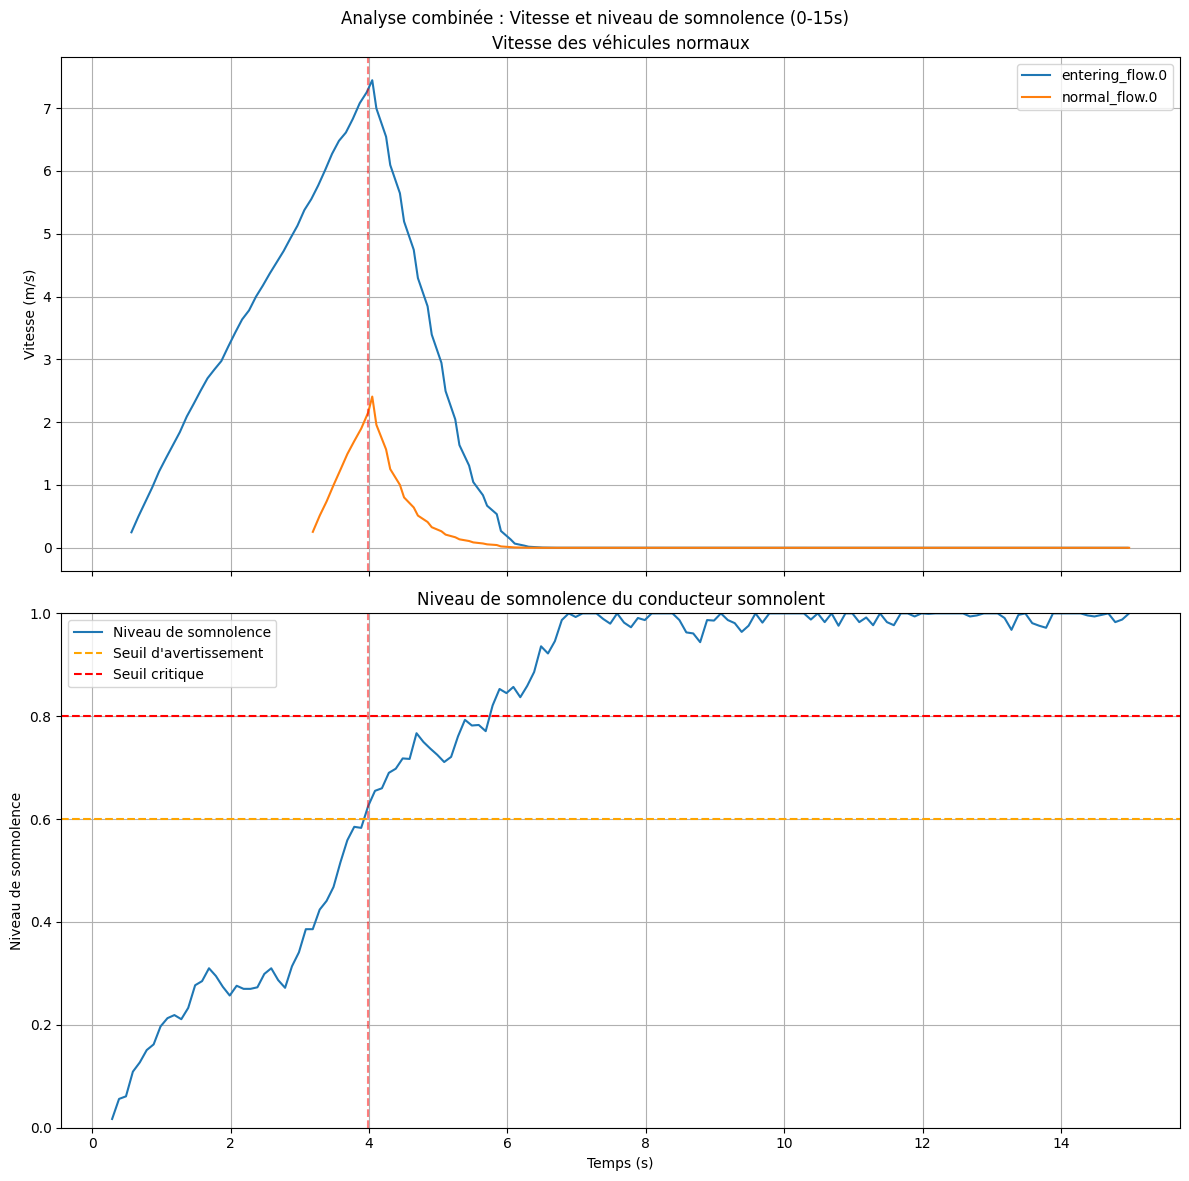

Graphique d'analyse combinée sauvegardé.
Nombre total de DENM envoyés : 111
Nombre de lignes DENM affichées : 1


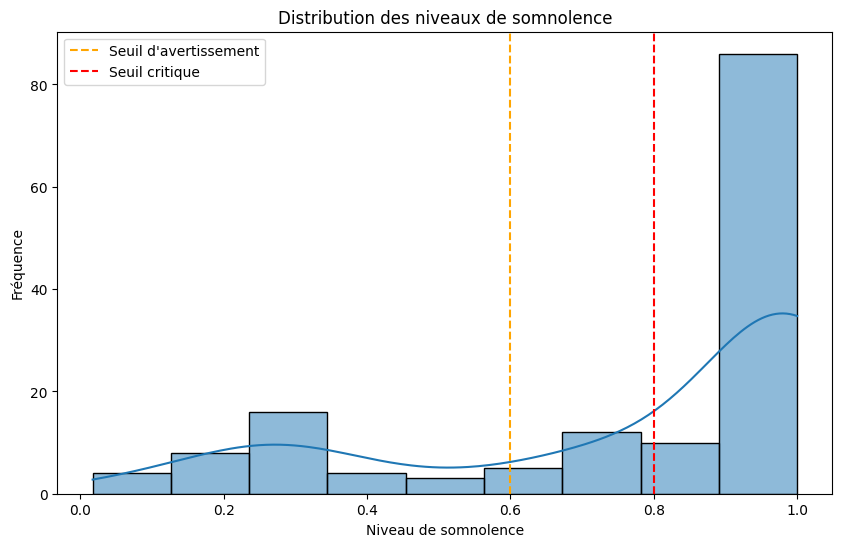

Graphique de distribution des niveaux de somnolence sauvegardé.


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import glob

# Paramètres configurables
start_time = 0  # Temps de début de l'analyse
end_time = 15   # Temps de fin de l'analyse
max_denm_lines = 5  # Nombre maximum de lignes DENM à afficher
min_time_between_denm_lines = 15  # Temps minimum (en secondes) entre deux lignes DENM

# Création du répertoire pour sauvegarder les images
if not os.path.exists('./images'):
    os.makedirs('./images')

# Chargement des données
data_dir = '/home/yelfatihi/artery/scenarios/drowsiness-warning/data'
drowsy_data = pd.read_csv(os.path.join(data_dir, 'drowsiness_data_drowsy_driver.csv'))

# Charger tous les fichiers CSV des véhicules normaux
normal_files = glob.glob(os.path.join(data_dir, 'drowsiness_alert_*.csv'))
normal_data = pd.concat([pd.read_csv(file) for file in normal_files])

print("Données chargées avec succès.")
print(f"Nombre total d'enregistrements pour le conducteur somnolent : {len(drowsy_data)}")
print(f"Nombre total d'enregistrements pour les véhicules normaux : {len(normal_data)}")

# Préparation des données
drowsy_data['Time'] = pd.to_numeric(drowsy_data['Time'])
normal_data['Time'] = pd.to_numeric(normal_data['Time'])

# Trier les données par temps
drowsy_data = drowsy_data.sort_values('Time')
normal_data = normal_data.sort_values('Time')

# Filtrer les données pour l'intervalle spécifié
drowsy_data = drowsy_data[(drowsy_data['Time'] >= start_time) & (drowsy_data['Time'] <= end_time)]
normal_data = normal_data[(normal_data['Time'] >= start_time) & (normal_data['Time'] <= end_time)]

print(f"Données préparées et filtrées pour l'intervalle {start_time}-{end_time}s.")
print(f"Nombre d'enregistrements pour le conducteur somnolent après filtrage : {len(drowsy_data)}")
print(f"Nombre d'enregistrements pour les véhicules normaux après filtrage : {len(normal_data)}")

# Fonction pour filtrer les moments d'envoi de DENM
def filter_denm_times(denm_times):
    filtered_times = []
    last_time = -np.inf
    for time in denm_times:
        if len(filtered_times) < max_denm_lines and time - last_time >= min_time_between_denm_lines:
            filtered_times.append(time)
            last_time = time
    return filtered_times

# Analyse combinée
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12), sharex=True)


vehicles_to_analyze = normal_data['VehicleID'].unique()[:2]

for vehicle in vehicles_to_analyze:
    vehicle_data = normal_data[normal_data['VehicleID'] == vehicle]
    ax1.plot(vehicle_data['Time'], vehicle_data['Speed'], label=vehicle)

ax1.set_ylabel("Vitesse (m/s)")
ax1.legend()
ax1.grid(True)
ax1.set_title("Vitesse des véhicules normaux")

# Niveau de somnolence et seuils
ax2.plot(drowsy_data['Time'], drowsy_data['DrowsinessLevel'], label='Niveau de somnolence')
ax2.axhline(y=0.6, color='orange', linestyle='--', label='Seuil d\'avertissement')
ax2.axhline(y=0.8, color='red', linestyle='--', label='Seuil critique')
ax2.set_ylabel("Niveau de somnolence")
ax2.set_ylim(0, 1)
ax2.legend()
ax2.grid(True)
ax2.set_title("Niveau de somnolence du conducteur somnolent")

# Ajouter des lignes verticales pour les envois de DENM
denm_times = drowsy_data[drowsy_data['AlertType'] > 0]['Time']
filtered_denm_times = filter_denm_times(denm_times)
for time in filtered_denm_times:
    ax1.axvline(x=time, color='r', linestyle='--', alpha=0.5)
    ax2.axvline(x=time, color='r', linestyle='--', alpha=0.5)

plt.xlabel("Temps (s)")
plt.suptitle(f"Analyse combinée : Vitesse et niveau de somnolence ({start_time}-{end_time}s)")
plt.tight_layout()
plt.savefig('./images/analyse_combinee_drowsiness.png')
plt.show()

print("Graphique d'analyse combinée sauvegardé.")
print(f"Nombre total de DENM envoyés : {len(denm_times)}")
print(f"Nombre de lignes DENM affichées : {len(filtered_denm_times)}")

# Graphique supplémentaire : Distribution des niveaux de somnolence
plt.figure(figsize=(10, 6))
sns.histplot(drowsy_data['DrowsinessLevel'], kde=True)
plt.axvline(x=0.6, color='orange', linestyle='--', label='Seuil d\'avertissement')
plt.axvline(x=0.8, color='red', linestyle='--', label='Seuil critique')
plt.xlabel("Niveau de somnolence")
plt.ylabel("Fréquence")
plt.title("Distribution des niveaux de somnolence")
plt.legend()
plt.savefig('./images/distribution_drowsiness.png')
plt.show()

print("Graphique de distribution des niveaux de somnolence sauvegardé.")

Données chargées avec succès.
Nombre total d'enregistrements pour vehB : 109
Données filtrées pour l'intervalle 0-30s.
Nombre d'enregistrements pour vehB après filtrage : 109


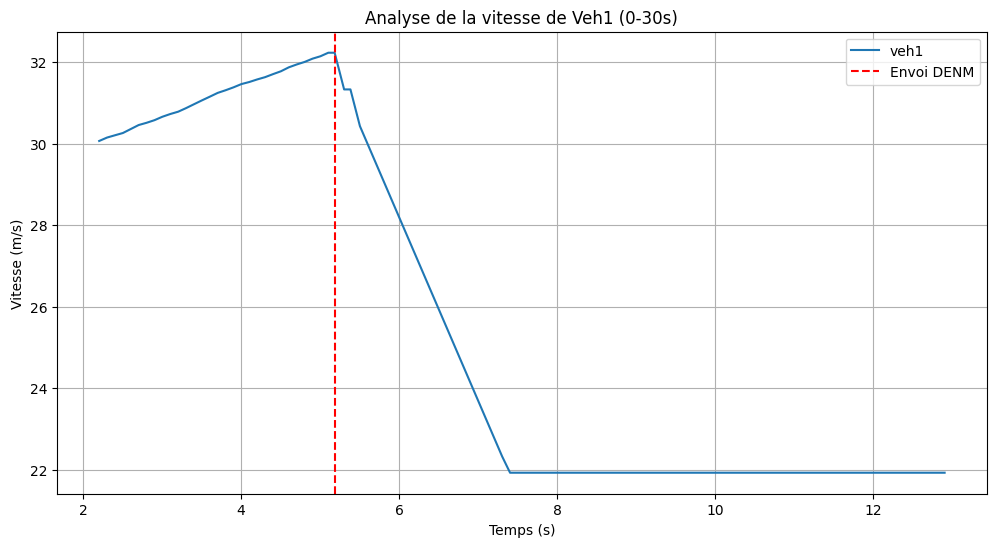

Graphique d'analyse de vitesse sauvegardé.

Statistiques de base pour la vitesse du véhicule B:
count    109.000000
mean      25.602807
std        4.266801
min       21.931000
25%       21.931000
50%       21.931000
75%       30.512000
max       32.230000
Name: Speed, dtype: float64


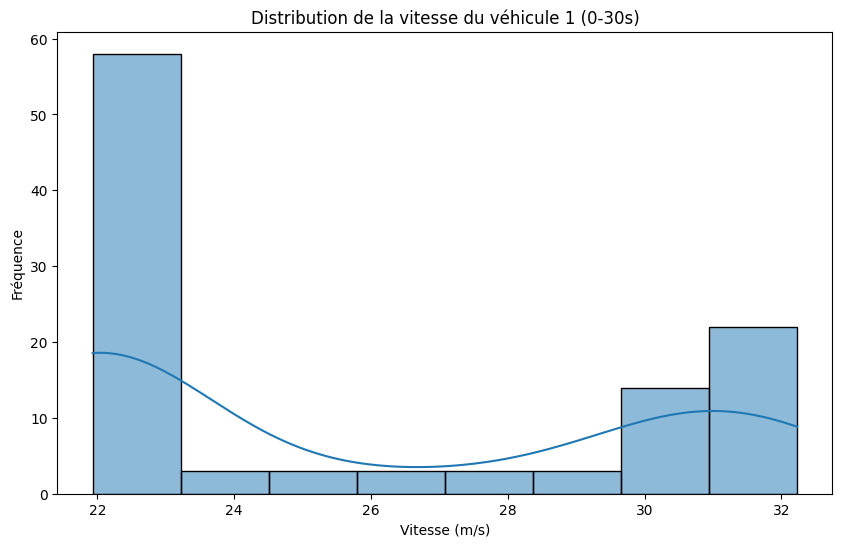

Histogramme de la vitesse sauvegardé.


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

# Chemin vers les données
data_path = '/home/yelfatihi/artery/scenarios/lane_change_warning/data'

# Chargement des données
alert_data_B = pd.read_csv(os.path.join(data_path, 'lane_change_alert_vehB.csv'))

print("Données chargées avec succès.")
print(f"Nombre total d'enregistrements pour vehB : {len(alert_data_B)}")

# Préparation des données
alert_data_B['Time'] = pd.to_numeric(alert_data_B['Time'])

# Trier les données par temps
alert_data_B = alert_data_B.sort_values('Time')

# Fonction pour filtrer les données selon un intervalle de temps
def filter_data_by_time(data, start_time, end_time):
    return data[(data['Time'] >= start_time) & (data['Time'] <= end_time)]

# Paramètres pour l'analyse
start_time = 0  # Temps de début de l'analyse
end_time = 30   # Temps de fin de l'analyse

# Filtrer les données pour l'intervalle spécifié
alert_data_B_filtered = filter_data_by_time(alert_data_B, start_time, end_time)

print(f"Données filtrées pour l'intervalle {start_time}-{end_time}s.")
print(f"Nombre d'enregistrements pour vehB après filtrage : {len(alert_data_B_filtered)}")

# Analyse de la vitesse
plt.figure(figsize=(12, 6))
plt.plot(alert_data_B_filtered['Time'], alert_data_B_filtered['Speed'], label='veh1')
plt.axvline(x=5.186, color='r', linestyle='--', label='Envoi DENM')
plt.xlabel("Temps (s)")
plt.ylabel("Vitesse (m/s)")
plt.title(f"Analyse de la vitesse de Veh1 ({start_time}-{end_time}s)")
plt.legend()
plt.grid(True)
plt.savefig('./images/analyse_vitesse_vehB.png')
plt.show()

print("Graphique d'analyse de vitesse sauvegardé.")

# Analyse supplémentaire si nécessaire
# Par exemple, vous pouvez ajouter une analyse de la distance ou d'autres métriques disponibles dans vos données

# Afficher les statistiques de base
print("\nStatistiques de base pour la vitesse du véhicule B:")
print(alert_data_B_filtered['Speed'].describe())

# Histogramme de la vitesse
plt.figure(figsize=(10, 6))
sns.histplot(alert_data_B_filtered['Speed'], kde=True)
plt.title(f"Distribution de la vitesse du véhicule 1 ({start_time}-{end_time}s)")
plt.xlabel("Vitesse (m/s)")
plt.ylabel("Fréquence")
plt.savefig('./images/histogramme_vitesse_vehB.png')
plt.show()

print("Histogramme de la vitesse sauvegardé.")